In [53]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import numpy as np

In [3]:
df = pd.read_csv("weatherAUS.csv")

### Number of samples that we have:

In [4]:
num_of_samples = df.shape[0]  # Number of samples
num_of_columns = df.shape[-1]  # Number of atributes
print("Number of samples = {}  Number of atributes = {}".format(num_of_samples, num_of_columns))

Number of samples = 145460  Number of atributes = 23


### We have 145460 samples in our dataset

### Let's look at the columns that we have:

In [5]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


### It is seen that we have information about temperature, rain, pressure, wind etc. for each region on each date

### Let's conut a kind of a mean temperature which is going to be:
$$
MeanTemp = \frac{MaxTemp + MinTemp}{2}
$$

In [14]:
df["MeanTemp"] = (df["MinTemp"] + df["MaxTemp"]) / 2

/home/dimdimi4/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MeanTemp
143882,2013-03-01,Uluru,19.7,30.0,0.8,NaN,NaN,ESE,48.0,E,...,54.0,1010.6,1007.5,NaN,NaN,21.7,28.4,No,No,24.85
143883,2013-03-02,Uluru,21.6,33.1,0.0,NaN,NaN,E,33.0,E,...,33.0,1010.5,1006.5,NaN,NaN,24.6,31.3,No,No,27.35
143884,2013-03-03,Uluru,21.3,36.1,0.0,NaN,NaN,E,33.0,ENE,...,27.0,1006.9,1002.7,NaN,NaN,27.6,34.5,No,No,28.70
143885,2013-03-04,Uluru,22.9,37.7,0.0,NaN,NaN,ENE,39.0,E,...,22.0,1006.0,1002.1,NaN,NaN,28.7,35.4,No,No,30.30
143886,2013-03-05,Uluru,24.0,39.0,0.0,NaN,NaN,S,39.0,E,...,21.0,1006.9,1003.5,NaN,NaN,29.9,37.3,No,No,31.50


In [8]:
regions = df["Location"].unique()
print("We have information about {} regions".format(len(regions)))

We have information about 49 regions


#### There are 49 regions here and it seems logical that the weather for each of them should be taken indivudially
#### So, it is worth separating our data by regions 

In [10]:
df_by_region = []  # list with DataFrames for each region
for region in regions:  # looping through regions
    df_by_region.append(df[df["Location"] == region])  # adding DataFrame for a region

### For each region let's count average value of all `MeanTemp` using the following formula:
$$
T_r = \frac{\sum_{i = 0}^{n} MeanTemp_i}{n}
$$

In [59]:
means = []# List with all means for all regions
means_values = []  # Only means values without a region
for df in df_by_region:
    mean_temp = df["MeanTemp"].mean()
    region = df["Location"].unique()[0]
    means.append([region, mean_temp])
    means_values.append(mean_temp)


In [60]:
means[:5]

[['Albury', 16.088910956636873],
 ['BadgerysCreek', 17.57964273677115],
 ['Cobar', 19.51346986346986],
 ['CoffsHarbour', 19.196183461667225],
 ['Moree', 19.926405054871964]]

### A Box plot for mean temperatures

Text(0.5, 1.0, 'Box Plot for Mean Temperature')

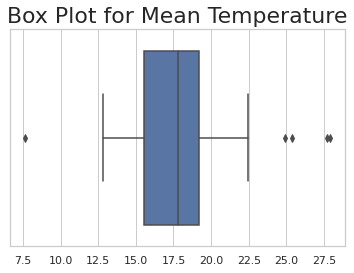

In [30]:
sns.set_theme(style='whitegrid')  # sets Grid
means_box_plot = sns.boxplot(x=means_values)
means_box_plot.set_title("Box Plot for Mean Temperature", fontsize=22)

In [33]:
sorted_means = sorted(means_values)
print(sorted_means)

[7.643938356164384, 12.828028308097432, 13.398811881188117, 13.472493734335838, 13.819323107702568, 13.888929404900816, 14.004647330257086, 14.151445578231293, 14.32811470006592, 14.425257731958762, 15.10545484508899, 15.232901296111667, 15.507528314457028, 15.54367681498829, 15.703276081424937, 16.088910956636873, 16.134597156398105, 16.228704939919893, 16.273193215339234, 16.324526420737786, 16.50976775956284, 16.77994579945799, 17.57964273677115, 17.741172781436187, 17.786257892987702, 17.907384460817145, 18.200810989738496, 18.388132490013316, 18.666777740753083, 18.93372267145852, 18.95545171339564, 18.973727671048195, 18.97952694235589, 19.05679627783317, 19.1421210106383, 19.166823687752355, 19.196183461667225, 19.351413368806117, 19.51346986346986, 19.926405054871964, 19.98279480346436, 21.192920645373725, 21.431273644388398, 21.561926756845924, 22.426803118908385, 24.893891998682907, 25.390210595590656, 27.719698996655517, 27.876073331244125]


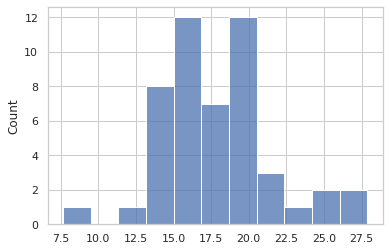

In [35]:
sns.histplot(x=sorted_means)

### Before checking any hypothesis or comparing our data, let's check it for normality

### QQ plot of mean temperatures:

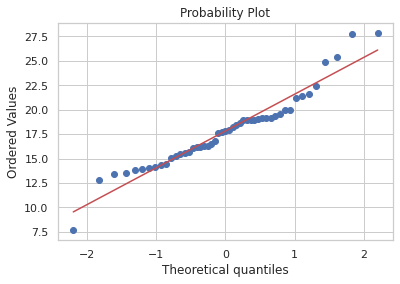

In [41]:
qq_plot = stats.probplot(means_values, dist="norm", plot=pylab)
pylab.show()

### As we see our data does not really follow normal distribution
### However in the middle part of our dataset it looks close to the `normal distribution`

### Maybe we will se more details using a histogram:

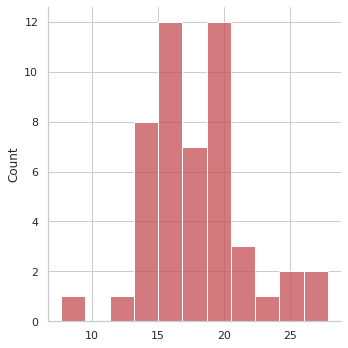

In [49]:
dist_plot = sns.displot(means_values, color="r")

### Shapiro test for our data,  and I will use:
$$
\alpha = 0.05 
$$


In [50]:
alpha = 0.05  # Confidence level
stat, p = stats.shapiro(means_values)
print("Our stat error is {}, and our p-value is {}".format(stat, p))

Our stat error is 0.9488652348518372, and our p-value is 0.03323351591825485


#### We see that we have got $$p-value=0.0332...$$ which is less than `0.05`
#### And this means that we can't support an argument that our data is normally distributed

#### Let's run  D’Agostino’s K-squared test, which basically checks the skewness. 
#### And again I will use `0.05` as a confidence level

In [52]:
stat_norm, p_norm = stats.normaltest(means_values)
print("Our stat error is {}, and our p-value is {}".format(stat, p))

Our stat error is 0.9488652348518372, and our p-value is 0.03323351591825485


### And we see that both test gave nearly simular results, which means that we have more evidence that **`it is not a normal distribution`**.

### Now let's find regions with most and least and middle mean temperatures

In [58]:
min_mean_temp = sorted_means[0]
max_mean_temp = sorted_means[-1]
median_mean_temp = np.median(sorted_means)
pd.DataFrame({
    "Min Mean Temp": [min_mean_temp],
    "Median Mean Temp": [median_mean_temp],
    "Max Mean Temp": [max_mean_temp]
             })


,Min Mean Temp,Median Mean Temp,Max Mean Temp
0,7.643938,17.786258,27.876073


In [61]:
min_mean_temp_region = ""
max_mean_temp_region = ""
median_mean_temp_region = ""

for mean in means:
    if mean[-1] == min_mean_temp:
        min_mean_temp_region = mean[0]
    if mean[-1] == median_mean_temp:
        median_mean_temp_region = mean[0]
    if mean[-1] == max_mean_temp:
        max_mean_temp_region = mean[0]

### The hottest, middle and coldest regions:

In [62]:
pd.DataFrame({
    "Min Mean Temp Region": [min_mean_temp_region], 
    "Median Mean Temp Region": [median_mean_temp_region],
    "Max Mean Temp Region": [max_mean_temp_region],
})

,Min Mean Temp Region,Median Mean Temp Region,Max Mean Temp Region
0,MountGinini,Mildura,Darwin


In [71]:
max_temps = []
for df in df_by_region:
    max_temp = df["MaxTemp"].mean()
    region = df["Location"].unique()[0]
    max_temps.append([region, max_temp])

In [72]:
max_temps[:10]

[['Albury', 22.640871574777158],
 ['BadgerysCreek', 24.031208053691277],
 ['Cobar', 25.870093147039256],
 ['CoffsHarbour', 23.965384615384615],
 ['Moree', 26.950548354935194],
 ['Newcastle', 24.10106990014265],
 ['NorahHead', 22.588937457969067],
 ['NorfolkIsland', 21.83025265957447],
 ['Penrith', 24.764366290643665],
 ['Richmond', 24.458664440734555]]

In [76]:
max_temp = 0
max_temp_region = ""
for i in max_temps:
    if i[-1] > max_temp:
        max_temp = i[-1]
        max_temp_region = i[0]
    

In [77]:
print("Hottest region is {} and max Temp here is {}".format(max_temp_region, max_temp))

Hottest region is Katherine and max Temp here is 34.935435630689206


### Let's look at the boxplot for Max Temperatures

Text(0.5, 1.0, 'Max temperature box plot')

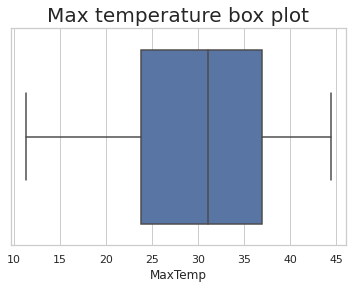

In [81]:
max_temp_boxplot = sns.boxplot(data=df, x="MaxTemp")
max_temp_boxplot.set_title("Max temperature box plot", fontsize=20)

Text(0.5, 1.0, 'Max Mean temperature box plot')

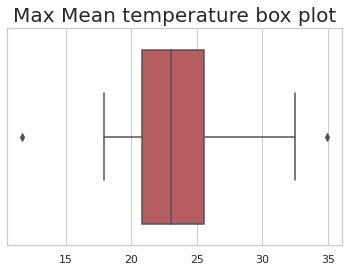

In [86]:
max_temp_values = [i[-1] for i in max_temps]
max_temp_mean_boxplot = sns.boxplot(x=max_temp_values, color="r")
max_temp_mean_boxplot.set_title("Max Mean temperature box plot", fontsize=20)

### We assume that min and max temperatures should be correlated, but let's check it
### We can use Relative Plot for this. However, we can hardly see anything here

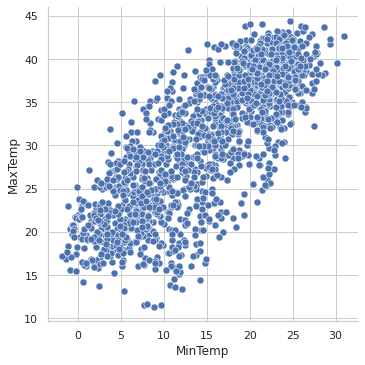

In [91]:
sns.relplot(x="MinTemp", y="MaxTemp", palette="viridis",data=df, s=50)

### So, I will go with calculations and count `Pearson's correlation` for the hall dataset and for each region separately.

In [97]:
df1 = df["MinTemp"].dropna()  # Min Temp with no NA
df2 = df["MaxTemp"].dropna()  # Max Temp with no NA
all_corr = stats.pearsonr(df1[:min(df1.shape[0], df2.shape[0])], df2[:min(df1.shape[0], df2.shape[0])])
print("Pearsons correlation is {}".format(all_corr[0]))

Pearsons correlation is 0.7200756375961287


### After dropping NA we see that the correlation between Min and Max temperatures is more than `0.7`